# 랜덤 함수 만들기

In [6]:
## 원본
# def pseudo_sample(mult = 16809,
#                   mod = (2**31)-1,
#                   seed = 1234567,
#                   size = 1):
#     """
#     generate pseudo random float number
#     between (0, 1)
#     """
#     res = []
#     x = (seed * mult + 1)%mod
#     res.append(x/mod)
#     for i in range(1, size):
#         x = (x * mult + 1)%mod
#         res.append(x/mod)
#     return res

In [70]:
def pseudo_sample(x0 = 16809,
                  mod = (2**31)-1,
                  seed = 1234567,
                  size = 1):
    """
    유사 난수 생성(0과 1사이)
    입력값
      x0: 초기 x0값
      mod: 난수 주기
      seed: 랜덤 시드
      size: 추출할 난수 개수
    출력값
      res: 0과 1사이 실수 난수 리스트
    """
    res = []
    x = (seed * x0 + 1)%mod
    u = x/mod
    res.append(u)
    for i in range(1, size):
        x = (seed * x + 1)%mod
        u = x/mod
        res.append(u)
    return res
    
def uniform_cont(low=0,
                 high=1,
                 seed=1234567,
                 size=1):
    """
    균일분포(연속형)에서 난수 추출
    입력값
      low: 하한
      hight: 상한
      seed: 랜덤 시드
      size: 추출 개수
    출력값
      res: 난수 리스트
    """
    x_list = pseudo_sample(seed=seed, size=size)
    res = []
    for x in x_list:
        val = low+(high-low)*x
        res.append(val)
    return res    
    
def uniform_disc(low=0,
                 high=1,
                 seed=1234567,
                 size=1):
    """
    균일분포(이산형)에서 랜덤 숫자 추출
    입력값
      low: 하한
      hight: 상한
      seed: 랜덤 시드
      size: 추출 개수
    출력값
      res: 난수 리스트
    """
    x_list = pseudo_sample(seed=seed, size=size)
    res = []
    for x in x_list:
        val = int(low+(high-low)*x)
        res.append(val)
    return res    

# 정규 분포

In [71]:
def normal_pdf(mu, s, x):
    pi = 3.1415926535 
    e = 2.7182818284
    res = (1/(((2*pi)**0.5)*s))*(e**(-0.5*(((x-mu)/s)**2)))
    return res

In [78]:
def normal_sample(mu, s, seed=1234567, size=1):
    """
    정규 분포에서 랜덤 숫자 추출
    """
    burn_in = 100
    size = burn_in + size
    u_list = pseudo_sample(seed=seed*2, size=size)
    xt_candidates = uniform_cont(low=mu-3*s, high=mu+3*s, size=size)
    x0 = mu
    xt = x0
    res = []

    for i in range(0, size):
        xt_candidate = xt_candidates[i]
        pi_y = normal_pdf(mu, s, xt_candidate)
        pi_x = normal_pdf(mu, s, xt)
        accept_prob = pi_y/pi_x
        if u_list[i] < accept_prob:
            xt = xt_candidate
        res.append(xt)
    
    res = res[burn_in:]
    return res

In [79]:
samples = normal_sample(mu=10, s=3, size=1000)

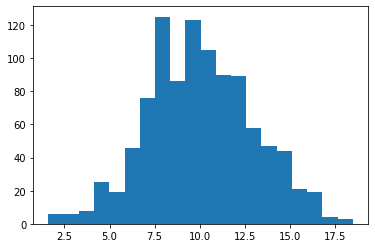

In [80]:
import matplotlib.pyplot as plt

plt.hist(samples, bins=20)
plt.show()

# 감마 분포

In [47]:
def gamma_function(alpha, x):
    """
    감마 함수
    입력값: alpha, x
    출력값: res(실수)
    """
    e = 2.7182818284
    res = (x**(alpha-1))*(e**(-x))
    return res 

def seq(start, stop, step):
    """
    수열 만들기
    입력값: start(시작 값), stop(끝 값), step(한스텝당 증가 수)
    출력값: res(리스트)
    """
    res = []
    current = start
    while current < stop:
        res.append(current)
        current += step
    return res

def gamma(alpha):
    """
    감마
    입력값: alpha
    출력값: res(실수)
    """
    a = 0
    b = 100
    x_list = seq(0.0001, 100, 0.001)
    gamma_list = []
    for x in x_list:
        y = gamma_function(alpha, x)
        gamma_list.append(y)
    res = ((b-a)/len(x_list))*sum(gamma_list)
    return res

def gamma_pdf(alpha, beta, x):
    e = 2.7182818284
    res = (1/(gamma(alpha)*(beta**alpha)))*(x**(alpha-1))*(e**((-1/beta)*x))
    return res

In [48]:
def gamma_sample(alpha, beta, seed=1234567, size=1):
    """
    감마 분포에서 랜덤 숫자 추출
    """
    
    burn_in = 100
    size = burn_in + size
    u_list = pseudo_sample(seed=seed*2, size=size)
    xt_candidates = uniform_cont(low=0, high=5*alpha*beta, size=size)
    x0 = alpha*beta
    xt = x0
    res = []
    
    for i in range(0, size):
        xt_candidate = xt_candidates[i]
        pi_y = gamma_pdf(alpha, beta, xt_candidate)
        pi_x = gamma_pdf(alpha, beta, xt)
        accept_prob = pi_y/pi_x
        if u_list[i] < accept_prob:
            xt = xt_candidate
        res.append(xt)
    
    res = res[burn_in:]
    return res

In [49]:
samples = gamma_sample(alpha=3, beta=2, size=1000)

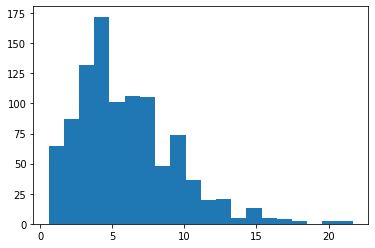

In [50]:
import matplotlib.pyplot as plt

plt.hist(samples, bins=20)
plt.show()

# 지수 분포

In [51]:
def exponential_pdf(beta, x):
    e = 2.7182818284
    res = (1/beta)*(e**((-1/beta)*x))
    return res

In [54]:
def exponential_sample(beta, seed=1234567, size=1):
    """
    지수 분포에서 랜덤 숫자 추출
    """
    
    burn_in = 100
    size = burn_in + size
    u_list = pseudo_sample(seed=seed*2, size=size)
    xt_candidates = uniform_cont(low=0, high=10*beta, size=size)
    x0 = beta
    xt = x0
    res = []
    
    for i in range(0, size):
        xt_candidate = xt_candidates[i]
        pi_y = exponential_pdf(beta, xt_candidate)
        pi_x = exponential_pdf(beta, xt)
        accept_prob = pi_y/pi_x
        if u_list[i] < accept_prob:
            xt = xt_candidate
        res.append(xt)
    
    res = res[burn_in:]
    return res

In [55]:
samples = exponential_sample(beta=2, size=1000)

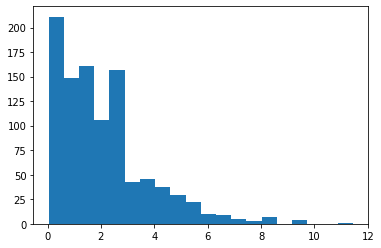

In [56]:
import matplotlib.pyplot as plt

plt.hist(samples, bins=20)
plt.show()

# 베타 분포

In [57]:
def gamma_function(alpha, x):
    """
    감마 함수
    입력값: alpha, x
    출력값: res(실수)
    """
    e = 2.7182818284
    res = (x**(alpha-1))*(e**(-x))
    return res 

def seq(start, stop, step):
    """
    수열 만들기
    입력값: start(시작 값), stop(끝 값), step(한스텝당 증가 수)
    출력값: res(리스트)
    """
    res = []
    current = start
    while current < stop:
        res.append(current)
        current += step
    return res

def gamma(alpha):
    """
    감마
    입력값: alpha
    출력값: res(실수)
    """
    a = 0
    b = 100
    x_list = seq(0.0001, 100, 0.001)
    gamma_list = []
    for x in x_list:
        y = gamma_function(alpha, x)
        gamma_list.append(y)
    res = ((b-a)/len(x_list))*sum(gamma_list)
    return res   

def beta_pdf(alpha, beta, x):
    beta_function = ((gamma(alpha+beta))/(gamma(alpha)*gamma(beta)))
    res = beta_function*(x**(alpha-1))*((1-x)**(beta-1))
    return res

In [58]:
def beta_sample(alpha, beta, seed=1234567, size=1):
    """
    베타 분포에서 랜덤 숫자 추출
    """
    
    burn_in = 100
    size = burn_in + size
    u_list = pseudo_sample(seed=seed*2, size=size)
    xt_candidates = uniform_cont(low=0, high=1, size=size)
    x0 = 0.5
    xt = x0
    res = []
    
    for i in range(0, size):
        xt_candidate = xt_candidates[i]
        pi_y = beta_pdf(alpha, beta, xt_candidate)
        pi_x = beta_pdf(alpha, beta, xt)
        accept_prob = pi_y/pi_x
        if u_list[i] < accept_prob:
            xt = xt_candidate
        res.append(xt)
    
    res = res[burn_in:]
    return res

In [60]:
samples = beta_sample(alpha=0.5, beta=0.5, size=1000)

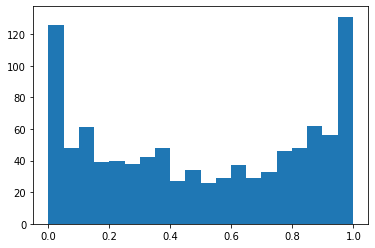

In [61]:
import matplotlib.pyplot as plt

plt.hist(samples, bins=20)
plt.show()